In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
df=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
df=df.drop(columns=['Serial No.'])

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=.2)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [8]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

2022-07-21 14:28:32.451410: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [11]:
history=model.fit(x_train,y_train,epochs=60,validation_split=.2)

2022-07-21 14:28:32.693360: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/60
10/10 [==============================] - 1s 23ms/step - loss: 0.3043 - val_loss: 0.2735
Epoch 2/60
10/10 [==============================] - 0s 5ms/step - loss: 0.2400 - val_loss: 0.2122
Epoch 3/60
10/10 [==============================] - 0s 6ms/step - loss: 0.1833 - val_loss: 0.1578
Epoch 4/60
10/10 [==============================] - 0s 6ms/step - loss: 0.1329 - val_loss: 0.1109
Epoch 5/60
10/10 [==============================] - 0s 5ms/step - loss: 0.0904 - val_loss: 0.0709
Epoch 6/60
10/10 [==============================] - 0s 6ms/step - loss: 0.0557 - val_loss: 0.0407
Epoch 7/60
10/10 [==============================] - 0s 5ms/step - loss: 0.0318 - val_loss: 0.0218
Epoch 8/60
10/10 [==============================] - 0s 5ms/step - loss: 0.0180 - val_loss: 0.0119
Epoch 9/60
10/10 [==============================] - 0s 6ms/step - loss: 0.0110 - val_loss: 0.0081
Epoch 10/60
10/10 [==============================] - 0s 6ms/step - loss: 0.0084 - val_loss: 0.0069
Epoch 11/60
10/10 

In [12]:
y_pred=model.predict(x_test)

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8193447987240239

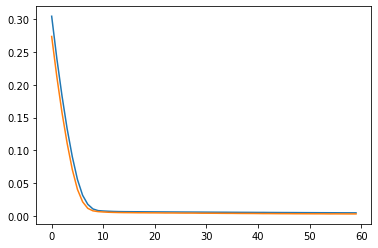

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])